In [1]:
# Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Mall customer data**

- It has four columns having CustomerID, Gender , Age, Income and Spending score

- Spending score between 1 to 100

- More spending score means more valuable customer

- Income and Spending score are the important variables

- Group the data based on Income and Spending score

In [2]:
# Read the data:
data=pd.read_csv("C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Ekeeda\\Datasets\\Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Select only income and Spending score columns
# M-1: select by using column names
# M-2: select by usong iloc
# M-3 : by droping unwanted columns
X=data.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [5]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

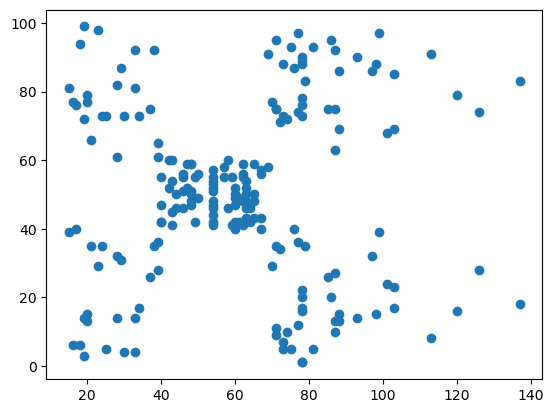

In [6]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])
plt.show()

$K-Means$

In [7]:
# We need to decide the number of clusters
# Elbow method
# Within cluster sum of squares(wcss)
# we randomly gives 10 clusters, for each cluster will calculate 
# within sum of squares

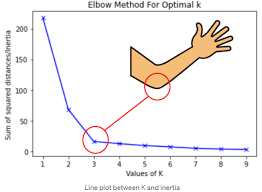

**First we Check for one cluster to understand Within sum of squares concept**

In [7]:
from sklearn.cluster import KMeans

In [9]:
### Just applying One cluster
### Base model

In [8]:
kmeans_1=KMeans(n_clusters=1,max_iter=300,random_state=1234)
kmeans_1

# n_clusters= no of clusters to choose
# max_iter= the distance calculations 
# random state= picking a random observations

KMeans(n_clusters=1, random_state=1234)

In [9]:
kmeans_1.fit(X)

KMeans(n_clusters=1, random_state=1234)

$Intertia$:

- measures how well a dataset was clustered by K-Means. 

- It is calculated by measuring the distance between each data point and its centroid, squaring this distance, 

- and summing these squares across one cluster

- Interita also called as **Within Cluster sum of squares(WCSS)**

- Choose the clusters find the distance between each data point to the cluster centroid

- Add all the distances is nothing but WCSS

In [10]:
kmeans_1.inertia_  # Variance

269981.28

In [11]:
kmeans_1.cluster_centers_

array([[60.56, 50.2 ]])

In [12]:
data['Annual Income (k$)'].mean(),data['Spending Score (1-100)'].mean()

(60.56, 50.2)

**Try to identify optimal clusters using elbow method**

In [13]:
# Read the data
# X
from sklearn.cluster import KMeans
kmeans_1=KMeans(n_clusters=1,max_iter=300,random_state=1234)
kmeans_1.fit(X)
kmeans_1.inertia_

269981.28

In [14]:
import warnings

warnings.filterwarnings('ignore')

wss=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters=i,max_iter=300,random_state=1234)
    kmeans.fit(X)
    wss.append(round(kmeans.inertia_,2))

In [15]:
wss

# If you are increase more clusters
# data points will be divided across the clusters
# 

[269981.28,
 181363.6,
 106348.37,
 73679.79,
 44448.46,
 37239.84,
 31615.31,
 25028.02,
 21818.11,
 20001.94,
 17511.74,
 16213.45,
 14300.04,
 12773.03,
 12003.53,
 11425.68,
 10413.97,
 9237.43,
 8646.61,
 8115.22]

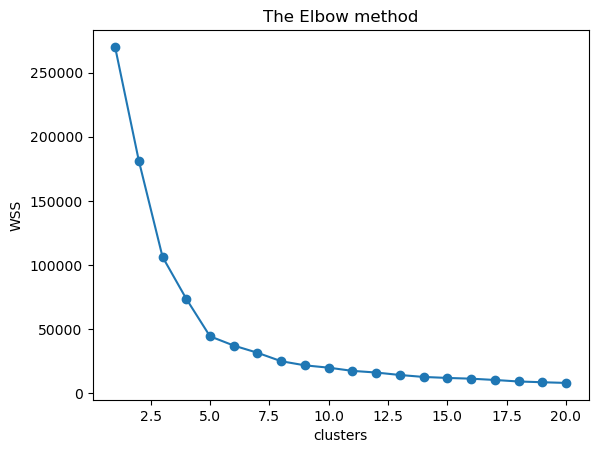

In [16]:
plt.scatter(range(1,21),wss)
plt.plot(range(1,21),wss)
plt.title("The Elbow method")
plt.xlabel("clusters")
plt.ylabel("WSS")
plt.show()

**Using elbow method we decided number of clusters are 5**

In [17]:
kmeans=KMeans(n_clusters=5,max_iter=300,random_state=1234)
y_clusters=kmeans.fit_predict(X) # which data point belongs to which cluster
y_clusters

# Here 0= cluster_1 
# and 4 = cluster_5
# Python index start with zero
# y_clusters will give that 
# We have 200 data points in X
# X[:3]
# income    Spending score   Cluster
# 15           39             0
# 15           81             3
# 16            6             0

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [19]:
data['Cluster_group']=y_clusters

In [20]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [21]:
data['Cluster_group'].value_counts()

Cluster_group
4    81
1    39
2    35
0    23
3    22
Name: count, dtype: int64

In [22]:
# 200 data points 
# cluster=0   23
# I want to retrive only 23 data point
data[data['Cluster_group']==0]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
2,3,Female,20,16,6,0
4,5,Female,31,17,40,0
6,7,Female,35,18,6,0
8,9,Male,64,19,3,0
10,11,Male,67,19,14,0
12,13,Female,58,20,15,0
14,15,Male,37,20,13,0
16,17,Female,35,21,35,0
18,19,Male,52,23,29,0


In [24]:
# These are the data points which belongs to only
# Cluster=0
data[data['Cluster_group']==0].iloc[:,[3,4]]

,Annual Income (k$),Spending Score (1-100)
0,15,39
2,16,6
4,17,40
6,18,6
8,19,3
10,19,14
12,20,15
14,20,13
16,21,35
18,23,29


In [25]:
# Group the data points
# We calcualte mean of each cluster data points
cs_1=data[data['Cluster_group']==0].iloc[:,[3,4]]
cs_2=data[data['Cluster_group']==1].iloc[:,[3,4]]
cs_3=data[data['Cluster_group']==2].iloc[:,[3,4]]
cs_4=data[data['Cluster_group']==3].iloc[:,[3,4]]
cs_5=data[data['Cluster_group']==4].iloc[:,[3,4]]
d1={'Cluster-1':cs_1.mean(),
   'Cluster-2':cs_2.mean(),
   'Cluster-3':cs_3.mean(),
   'Cluster-4':cs_4.mean(),
   'Cluster-5':cs_5.mean()}
pd.DataFrame(d1)

,Cluster-1,Cluster-2,Cluster-3,Cluster-4,Cluster-5
Annual Income (k$),26.304348,86.538462,88.200000,25.727273,55.296296
Spending Score (1-100),20.913043,82.128205,17.114286,79.363636,49.518519


- We read the data

- We selected specific columns

- We given randomly 10 clusters

- We calculated the interia of 10 clusters

- By using elbow method , we decided 5 clusters are enough

- We pass the 5 clusters to the K-means

- We pass the data (X)  and the get cluster values for all observations

- We divided into 5 Data frames w.r.t the cluster observations

- We calculated Average income and Average spending score of each cluster observation

In [26]:
# d1=pd.DataFrame(dict(cs_1.mean()),index=['Cluster-1'])
# d2=pd.DataFrame(dict(cs_2.mean()),index=['Cluster-2'])
# d3=pd.DataFrame(dict(cs_3.mean()),index=['Cluster-3'])
# d4=pd.DataFrame(dict(cs_4.mean()),index=['Cluster-4'])
# d5=pd.DataFrame(dict(cs_5.mean()),index=['Cluster-5'])
# pd.concat[d1+d2+d3+d4+d5]

In [27]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [26]:
# we need to perform scatter plot: Annual income vs spending score
# But not all the data points
# we need provide by cluster wise
# X  is data of two columns
X[:,0]  # First column
X[:,1]  # Second column

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83], dtype=int64)

In [35]:
X[y_clusters==0,1]

array([39,  6, 40,  6,  3, 14, 15, 13, 35, 29, 35,  5, 14, 32, 31,  4,  4,
       14, 17, 26, 35, 36, 28], dtype=int64)

In [28]:
# X[:,0]  # O  fisrt column values
# X[:,1]  # 1  second column values
# plt.scatter(X[:,0],X[:,1])

# (X[y_clusters==0,0],X[y_clusters==0,1]
# (X[y_clusters==1,0],X[y_clusters==1,1]
# (X[y_clusters==3,0],X[y_clusters==3,1]
# (X[y_clusters==2,0],X[y_clusters==2,1]
# (X[y_clusters==4,0],X[y_clusters==4,1]

X[y_clusters]

 0   1
[15,39]========= > 0

0,0 ======= 15
0,1 ======= 39


y_clusters=0,0 ======= > first 0 represnts cluster

               ======= > second 0 represnts first column
               
    
y_clusters=0,1 ======= > first 0 represnts cluster

               ======= > second term 1 represnts second column
    

========= zero cluster with first column (0,0)

========= zero cluster with second column (0,1)

========= First cluster with first column (1,0)

========= First cluster with second column (1,1)

========= second cluster with first column (2,0)

========= second cluster with second column (2,1)

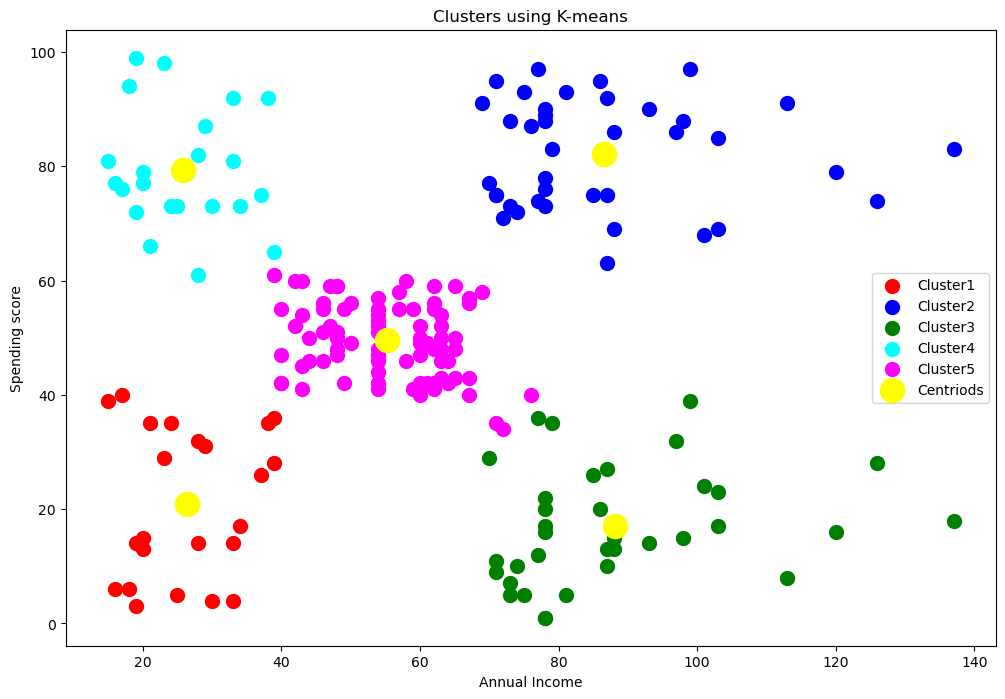

In [29]:
# Visulaize the clusters
# We are applying scatter plot between income and spending score w.r.t to clusters
plt.figure(figsize=(12,8))
plt.scatter(X[y_clusters==0,0],X[y_clusters==0,1],s=100,c='red',label="Cluster1")
plt.scatter(X[y_clusters==1,0],X[y_clusters==1,1],s=100,c='blue',label="Cluster2")
plt.scatter(X[y_clusters==2,0],X[y_clusters==2,1],s=100,c='green',label="Cluster3")
plt.scatter(X[y_clusters==3,0],X[y_clusters==3,1],s=100,c='cyan',label="Cluster4")
plt.scatter(X[y_clusters==4,0],X[y_clusters==4,1],s=100,c='magenta',label="Cluster5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centriods')
plt.title("Clusters using K-means")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.legend()
plt.show()

# Where s will give the size of the centriod

## silhouette_score

In [2]:
import pandas as pd
data=pd.read_csv("C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Ekeeda\\Datasets\\Mall_Customers.csv")
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv("C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Ekeeda\\Datasets\\Mall_Customers.csv")
X=data[['Annual Income (k$)','Spending Score (1-100)']].values
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
kmeans.labels_
silhouette_score(X,kmeans.labels_)

0.5376203956398481

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv("C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Ekeeda\\Datasets\\Mall_Customers.csv")
X=data[['Annual Income (k$)','Spending Score (1-100)']].values
# Initialize lists to store silhouette scores for each k
silhouette_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal k value that maximizes silhouette score
k_values=range(2,11)
optimal_k = k_values[np.argmax(silhouette_scores)]
optimal_silhouette_score = max(silhouette_scores)

print("Optimal number of clusters:", optimal_k)
print("Optimal silhouette score:", optimal_silhouette_score)


Optimal number of clusters: 5
Optimal silhouette score: 0.553931997444648


In [15]:
silhouette_scores

[0.31827029153316977,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5393922132561455,
 0.45415347063163414,
 0.4563394686110682,
 0.4553729779390266,
 0.449795408266166]

In [20]:
silhouette_scores.index(max(silhouette_scores))  # one method
print("the index of maximum value is:",np.argmax(silhouette_scores))
print("the maximum value is:",np.max(silhouette_scores))
k_values=range(2,11) # [2,3,4,5,6,7,8,9,10,11]
k_values[3]

# fisrt get the max values
# second get the index of the max value
# pass that index inthe list of cluster values ==== >5

the index of maximum value is: 3
the maximum value is: 0.553931997444648


5

$Hierarchical$ $Cluster$

In [5]:
# Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Read the data:
data=pd.read_csv("C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Ekeeda\\Datasets\\Mall_Customers.csv")

X=data.iloc[:,[3,4]].values


In [6]:
import scipy.cluster.hierarchy as sch

**Linkage functions**

- Every observation consider as one cluster

- Based on symmetry matrix we form the groups

- Linkage functions

    - Simple linkage : Less distance that means more realtion
    
    - Complete linkage : Max distance that means less realtion
    
    - Average Ward Method

In [21]:
import scipy.cluster.hierarchy as sch
val=[[2,5],[3,6],[7,10],[12,10],[6,3],[10,20]]
sch.linkage(val)

array([[ 0.        ,  1.        ,  1.41421356,  2.        ],
       [ 4.        ,  6.        ,  4.24264069,  3.        ],
       [ 2.        ,  3.        ,  5.        ,  2.        ],
       [ 7.        ,  8.        ,  5.65685425,  5.        ],
       [ 5.        ,  9.        , 10.19803903,  6.        ]])

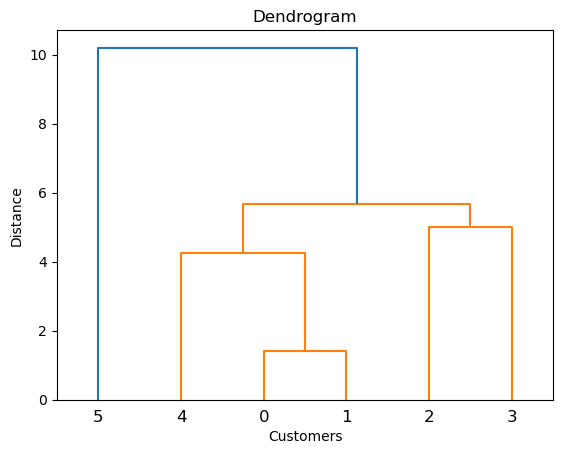

In [23]:
import matplotlib.pyplot as plt
dendogram=sch.dendrogram(sch.linkage(val,method='single'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

In [7]:
sch.linkage(X,method='single')

array([[ 48.        ,  49.        ,   0.        ,   2.        ],
       [ 65.        ,  68.        ,   0.        ,   2.        ],
       [156.        , 158.        ,   0.        ,   2.        ],
       [129.        , 131.        ,   0.        ,   2.        ],
       [ 67.        ,  69.        ,   1.        ,   2.        ],
       [ 64.        ,  66.        ,   1.        ,   2.        ],
       [ 60.        ,  61.        ,   1.        ,   2.        ],
       [ 63.        , 201.        ,   1.        ,   3.        ],
       [ 51.        ,  53.        ,   1.        ,   2.        ],
       [ 74.        ,  77.        ,   1.        ,   2.        ],
       [ 85.        , 209.        ,   1.        ,   3.        ],
       [ 79.        ,  82.        ,   1.        ,   2.        ],
       [ 78.        ,  80.        ,   1.        ,   2.        ],
       [ 76.        , 212.        ,   1.        ,   3.        ],
       [ 75.        , 213.        ,   1.        ,   4.        ],
       [ 81.        , 214

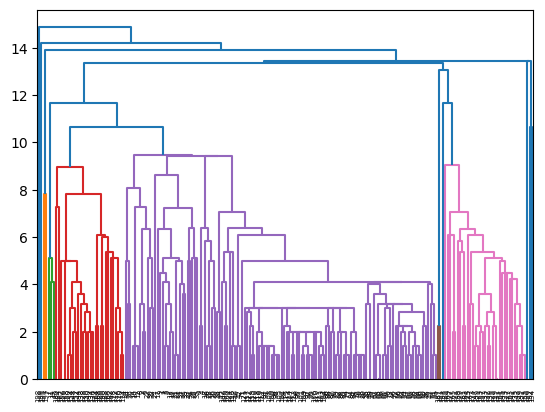

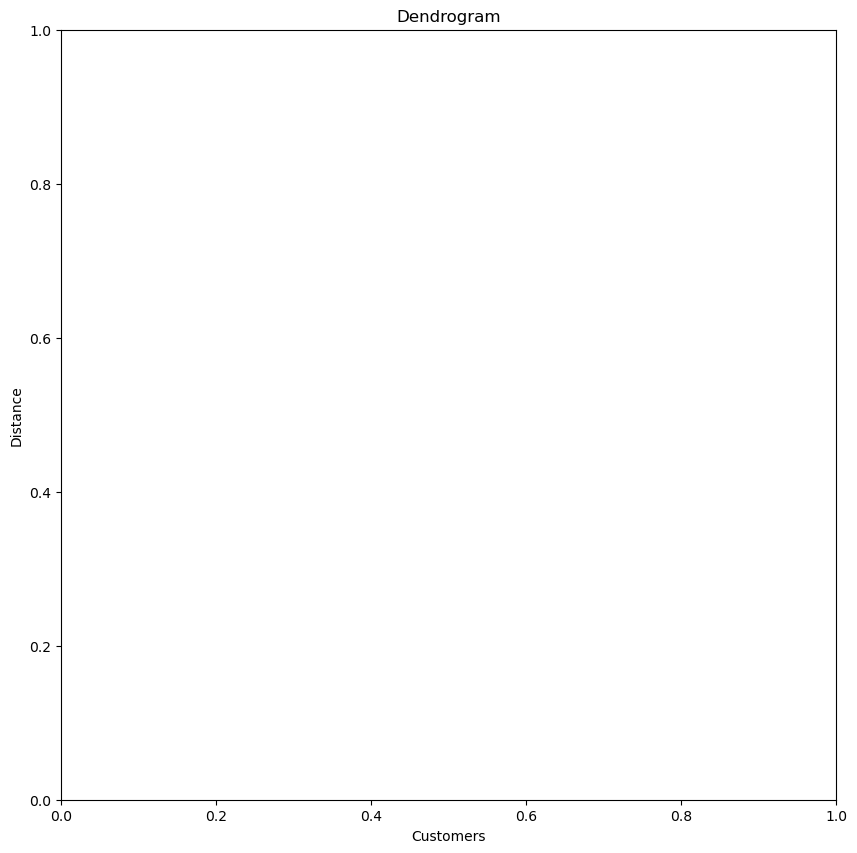

In [8]:
# Dendogram using Single
dendogram=sch.dendrogram(sch.linkage(X,method='single'))
plt.figure(figsize=(10,10))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

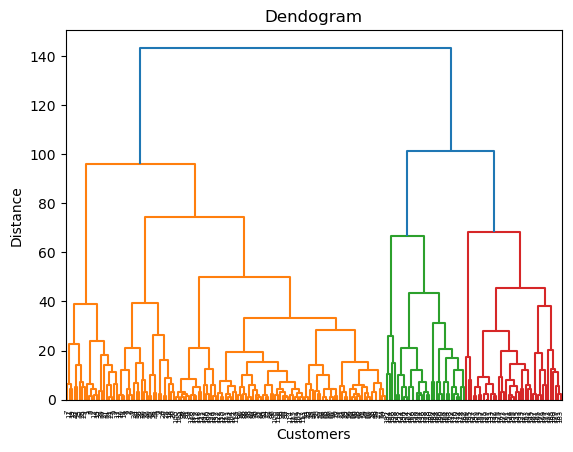

In [11]:
dendogram=sch.dendrogram(sch.linkage(X,method='complete'))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

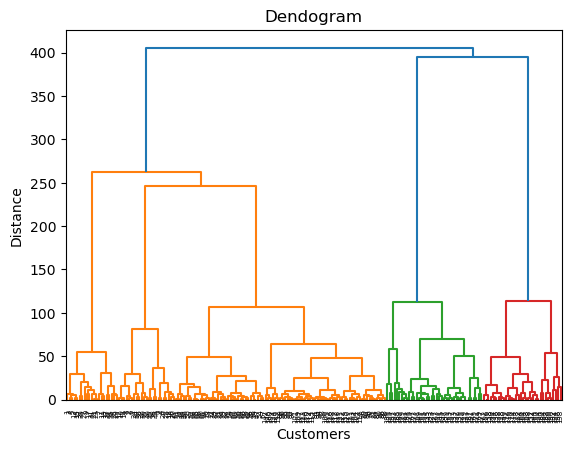

In [12]:
dendogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

In [ ]:
#Method-2

In [13]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,
                           affinity='euclidean',
                           linkage='ward')
y_hc=hc.fit_predict(X)
y_hc

# Those who are getting error affinity
# metric='euclidean'

C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [42]:
y_clusters

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4,
       0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1,
       4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [ ]:
k-means ======= > 1 sample , 3rd sample ======= > 0
hch =========== > 1 sample , 3rd sample ======= > 4

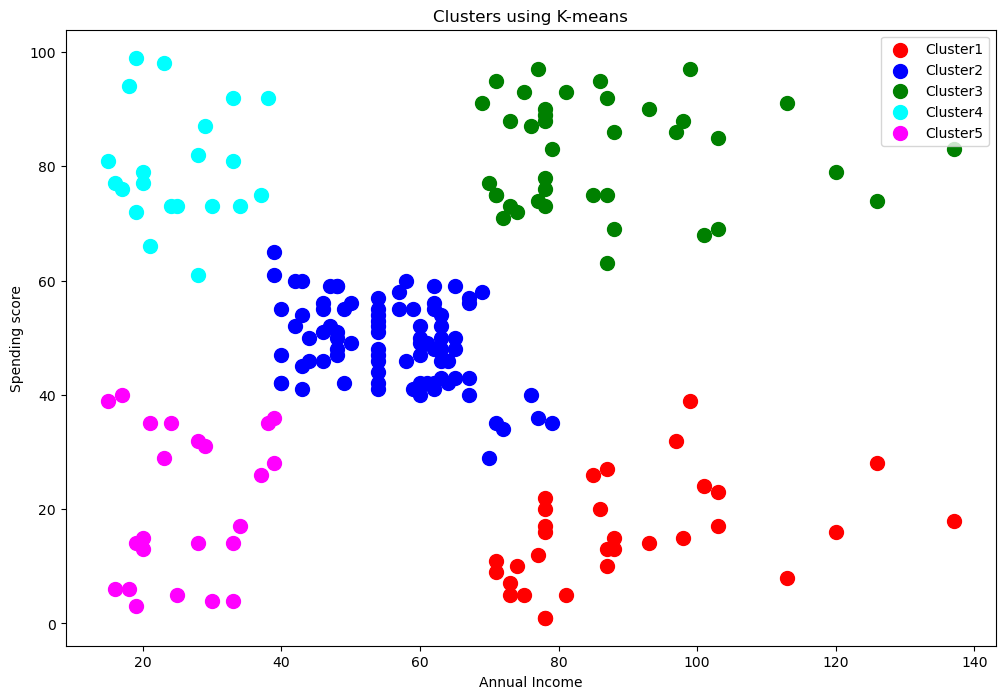

In [14]:
# Visulaize the clusters
# We are applying scatter plot between income and spending score w.r.t to clusters
plt.figure(figsize=(12,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label="Cluster1")
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label="Cluster2")
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label="Cluster3")
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label="Cluster4")
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='magenta',label="Cluster5")
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centriods')
plt.title("Clusters using Hierarchical")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.legend()
plt.show()